<a href="https://colab.research.google.com/github/Gabriellemga/Analise_Emprestimos_Biblioteca_UFRN/blob/main/Analise_de_emprestimos_da_biblioteca_UFRN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

### Este notebook faz parte do desafio **#7DaysOfCode da Alura** cujo objetivo será explorar os dados de empréstimos dos acervos do sistema de bibliotecas da UFRN.

## Dia 1- Importação dos dados

In [173]:
#importando  bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [174]:
#url base da leitura para o raw
base_url = 'https://raw.githubusercontent.com/Gabriellemga/Analise_Emprestimos_Biblioteca_UFRN/refs/heads/main/datasets/'

#lista com os nomes dos arquivos de emprestimo
lista_arquivos = [f'emprestimos-{x}{i}.csv' for x in range(2010,2020) for i in range(1,3)]
lista_arquivos.append('emprestimos-20201.csv')

#criação da estrutura para a leitura dos arquivos csv
lista_df = []

for nome_arquivo in lista_arquivos:
  raw = f'{base_url}/{nome_arquivo}'
  try:
    temp_df = pd.read_csv(raw)
    lista_df.append(temp_df)
    print(f'Arquivo {nome_arquivo} carregado com sucesso')
  except Exception as e:
    print(f"Error reading {raw}: {e}")

#concatenação dos df
df_emprestimo = pd.concat(lista_df, axis=0, ignore_index = True)

Arquivo emprestimos-20101.csv carregado com sucesso
Arquivo emprestimos-20102.csv carregado com sucesso
Arquivo emprestimos-20111.csv carregado com sucesso
Arquivo emprestimos-20112.csv carregado com sucesso
Arquivo emprestimos-20121.csv carregado com sucesso
Arquivo emprestimos-20122.csv carregado com sucesso
Arquivo emprestimos-20131.csv carregado com sucesso
Arquivo emprestimos-20132.csv carregado com sucesso
Arquivo emprestimos-20141.csv carregado com sucesso
Arquivo emprestimos-20142.csv carregado com sucesso
Arquivo emprestimos-20151.csv carregado com sucesso
Arquivo emprestimos-20152.csv carregado com sucesso
Arquivo emprestimos-20161.csv carregado com sucesso
Arquivo emprestimos-20162.csv carregado com sucesso
Arquivo emprestimos-20171.csv carregado com sucesso
Arquivo emprestimos-20172.csv carregado com sucesso
Arquivo emprestimos-20181.csv carregado com sucesso
Arquivo emprestimos-20182.csv carregado com sucesso
Arquivo emprestimos-20191.csv carregado com sucesso
Arquivo empr

In [175]:
# Verificando os tipos de dados
df_emprestimo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258018 entries, 0 to 2258017
Data columns (total 7 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id_emprestimo         int64  
 1   codigo_barras         object 
 2   data_renovacao        object 
 3   data_emprestimo       object 
 4   data_devolucao        object 
 5   matricula_ou_siape    float64
 6   tipo_vinculo_usuario  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 120.6+ MB


In [176]:
#Contagem dos valores
df_emprestimo.value_counts()

,,,,,,,count
id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,
709705,2009032168,2010/01/17 18:56:43.909000000,2010/01/04 09:58:46.549000000,2010/01/20 13:14:34.464000000,2.008010e+09,ALUNO DE GRADUAÇÃO,7
709704,2006021442,2010/01/17 18:56:43.923000000,2010/01/04 09:58:46.522000000,2010/02/01 13:59:02.528000000,2.008010e+09,ALUNO DE GRADUAÇÃO,7
709698,2009047725,2010/01/18 14:44:41.163000000,2010/01/04 09:21:19.099000000,2010/02/02 12:02:38.444000000,2.009047e+09,ALUNO DE GRADUAÇÃO,3
2351375,L057436,2016/01/31 07:30:36.293000000,2016/01/02 08:38:40.009000000,2016/02/21 13:16:29.000000000,2.016101e+10,ALUNO DE PÓS-GRADUAÇÃO,2
2351376,H004983,2016/01/31 07:31:36.786000000,2016/01/02 08:46:42.991000000,2016/02/22 16:10:28.000000000,2.016101e+10,ALUNO DE PÓS-GRADUAÇÃO,2
...,...,...,...,...,...,...,...
1443393,2012037906,2013/03/20 20:17:10.574000000,2013/03/07 11:24:19.326000000,2013/03/25 08:58:44.000000000,2.011038e+09,ALUNO DE GRADUAÇÃO,1
1443395,2011033069,2013/04/07 01:06:51.679000000,2013/03/07 11:25:22.661000000,2013/05/07 16:19:34.000000000,2.011106e+09,ALUNO DE PÓS-GRADUAÇÃO,1
1443401,2011078773,2013/03/22 18:04:25.360000000,2013/03/07 11:26:28.326000000,2013/04/03 16:53:35.000000000,2.012038e+09,ALUNO DE GRADUAÇÃO,1


In [177]:
#averiguando se há dados duplicatos
df_emprestimo.duplicated().sum()

np.int64(37)

In [178]:
#excluindo dados duplicatos
df_emprestimo = df_emprestimo.drop_duplicates()

In [179]:
df_emprestimo.value_counts()

,,,,,,,count
id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,
10322328,2014070441,2018/01/15 12:26:00.697000000,2017/12/29 18:21:09.060000000,2018/01/31 18:50:25.000000000,2.014063e+09,ALUNO DE GRADUAÇÃO,1
709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO,1
709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2.007211e+08,ALUNO DE GRADUAÇÃO,1
709688,2007027500,2010/01/19 15:59:26.464000000,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2.009046e+09,ALUNO DE GRADUAÇÃO,1
709689,L157395,2010/01/19 15:59:26.447000000,2010/01/04 08:27:33.596000000,2010/02/03 13:06:43.125000000,2.009046e+09,ALUNO DE GRADUAÇÃO,1
...,...,...,...,...,...,...,...
709717,2007019241,2010/01/19 13:46:16.545000000,2010/01/04 10:29:19.777000000,2010/02/03 08:06:10.018000000,2.006156e+08,ALUNO DE GRADUAÇÃO,1
709716,L107038,2010/01/19 13:46:16.556000000,2010/01/04 10:29:19.747000000,2010/02/03 08:06:24.253000000,2.006156e+08,ALUNO DE GRADUAÇÃO,1
709715,L200359,2010/01/19 14:38:53.133000000,2010/01/04 10:28:01.480000000,2010/02/01 14:41:13.147000000,2.010079e+09,ALUNO DE GRADUAÇÃO,1


In [180]:
# importando arquivo parquet com informações dos exemplares do acervo
df_exemplares = pd.read_parquet('https://github.com/Gabriellemga/Analise_Emprestimos_Biblioteca_UFRN/raw/refs/heads/main/datasets/dados_exemplares.parquet')
df_exemplares

,id_exemplar,codigo_barras,colecao,biblioteca,status_material,localizacao,registro_sistema
index,,,,,,,
0,5,L000003,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,694,1
1,4,L000002,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,688,1
2,3,L000001,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,638,1
3,7,L000114,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,616,5
5,10,L000041,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,657,15
...,...,...,...,...,...,...,...
568580,1353472,2021011150,Acervo Circulante,Biblioteca Setorial do Núcleo de Educação da I...,REGULAR,951,268231
568581,1353473,2019013454,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,997,268233
568582,1353474,2019012811,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,987,268234


In [181]:
#mesclando o dataframe de emprestimo com o dataframe dos exemplares
emprestimo_exemplares = df_emprestimo.merge(df_exemplares)
emprestimo_exemplares

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO,195347,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640,75019
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2.007211e+08,ALUNO DE GRADUAÇÃO,131639,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609,44494
4,709688,2007027500,2010/01/19 15:59:26.464000000,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2.009046e+09,ALUNO DE GRADUAÇÃO,225646,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686,91736
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072517,2989086,2008047044,NaN,2020/05/05 19:51:06.059000000,2021/05/13 14:53:31.000000000,3.067431e+06,SERVIDOR TÉCNICO-ADMINISTRATIVO,256297,Acervo Circulante,Biblioteca Setorial da Faculdade de Ciências d...,REGULAR,684,110098
2072518,2989087,2008047047,NaN,2020/05/05 19:51:06.135000000,2021/05/13 14:53:38.000000000,3.067431e+06,SERVIDOR TÉCNICO-ADMINISTRATIVO,256406,Acervo Circulante,Biblioteca Setorial da Faculdade de Ciências d...,REGULAR,628,110171
2072519,2989088,2010052905,NaN,2020/05/05 19:51:06.164000000,2021/05/13 15:01:46.000000000,3.067431e+06,SERVIDOR TÉCNICO-ADMINISTRATIVO,807821,Acervo Circulante,Biblioteca Setorial da Faculdade de Ciências d...,REGULAR,653,134173
2072520,2989089,2010048023,NaN,2020/06/09 11:54:02.669000000,2021/07/21 15:33:55.000000000,2.020101e+10,ALUNO DE PÓS-GRADUAÇÃO,804885,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,675,67712


In [182]:
emprestimo_exemplares.isnull().sum()

,0
id_emprestimo,0
codigo_barras,0
data_renovacao,1162077
data_emprestimo,0
data_devolucao,6178
matricula_ou_siape,2893
tipo_vinculo_usuario,0
id_exemplar,0
colecao,0
biblioteca,0


## Dia 2 -Limpeza de dados

In [183]:
#excluindo coluna
emprestimo_exemplares = emprestimo_exemplares.drop(columns = 'registro_sistema' )
emprestimo_exemplares.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO,195347,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2.007211e+08,ALUNO DE GRADUAÇÃO,131639,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609
4,709688,2007027500,2010/01/19 15:59:26.464000000,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2.009046e+09,ALUNO DE GRADUAÇÃO,225646,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686


In [184]:
#transformando coluna para o formato string
emprestimo_exemplares['matricula_ou_siape'] = emprestimo_exemplares['matricula_ou_siape'].astype('string')
emprestimo_exemplares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072522 entries, 0 to 2072521
Data columns (total 12 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   id_emprestimo         int64 
 1   codigo_barras         object
 2   data_renovacao        object
 3   data_emprestimo       object
 4   data_devolucao        object
 5   matricula_ou_siape    string
 6   tipo_vinculo_usuario  object
 7   id_exemplar           int64 
 8   colecao               object
 9   biblioteca            object
 10  status_material       object
 11  localizacao           int64 
dtypes: int64(3), object(8), string(1)
memory usage: 189.7+ MB


In [185]:
#criação de uma nova coluna com a classificação CDU-Classificação Decimal Universal
lista_CDU = []

for x in emprestimo_exemplares['localizacao'].values:
 if x >= 00 and x <= 99:
  lista_CDU.append('Generalidades. Ciência e conhecimento')
 elif x >= 100 and x <= 199:
  lista_CDU.append('Filosofia e psicologia.')
 elif x >= 200 and x <= 299:
  lista_CDU.append('Religião.')
 elif x >= 300 and x <= 399:
  lista_CDU.append('Ciências sociais.')
 elif x >= 400 and x <= 499:
  lista_CDU.append('Classe vaga. Provisoriamente não ocupada.')
 elif x >= 500 and x <= 599:
  lista_CDU.append('Matemática e ciências naturais.')
 elif x >= 600 and x <= 699:
  lista_CDU.append('Ciências aplicadas.')
 elif x >= 700 and x <= 799:
  lista_CDU.append('Belas artes.')
 elif x >= 800 and x <= 899:
  lista_CDU.append('Linguagem. Língua. Linguística.')
 elif x >= 900 and x <= 999:
  lista_CDU.append('Geografia. Biografia. História.')


emprestimo_exemplares['CDU'] = lista_CDU
emprestimo_exemplares

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,CDU
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas.
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2008023265.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas.
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,195347,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640,Ciências aplicadas.
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,200721119.0,ALUNO DE GRADUAÇÃO,131639,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609,Ciências aplicadas.
4,709688,2007027500,2010/01/19 15:59:26.464000000,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2009045971.0,ALUNO DE GRADUAÇÃO,225646,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686,Ciências aplicadas.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072517,2989086,2008047044,NaN,2020/05/05 19:51:06.059000000,2021/05/13 14:53:31.000000000,3067431.0,SERVIDOR TÉCNICO-ADMINISTRATIVO,256297,Acervo Circulante,Biblioteca Setorial da Faculdade de Ciências d...,REGULAR,684,Ciências aplicadas.
2072518,2989087,2008047047,NaN,2020/05/05 19:51:06.135000000,2021/05/13 14:53:38.000000000,3067431.0,SERVIDOR TÉCNICO-ADMINISTRATIVO,256406,Acervo Circulante,Biblioteca Setorial da Faculdade de Ciências d...,REGULAR,628,Ciências aplicadas.
2072519,2989088,2010052905,NaN,2020/05/05 19:51:06.164000000,2021/05/13 15:01:46.000000000,3067431.0,SERVIDOR TÉCNICO-ADMINISTRATIVO,807821,Acervo Circulante,Biblioteca Setorial da Faculdade de Ciências d...,REGULAR,653,Ciências aplicadas.
2072520,2989089,2010048023,NaN,2020/06/09 11:54:02.669000000,2021/07/21 15:33:55.000000000,20201014993.0,ALUNO DE PÓS-GRADUAÇÃO,804885,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,675,Ciências aplicadas.


## Dia 3- Análise exploratória de dados e DateTime

In [186]:
#convertendo os campos com data para o tipo date
emprestimo_exemplares['data_emprestimo'] = pd.to_datetime(emprestimo_exemplares['data_emprestimo'])
emprestimo_exemplares['data_renovacao'] = pd.to_datetime(emprestimo_exemplares['data_renovacao'])
emprestimo_exemplares['data_devolucao'] = pd.to_datetime(emprestimo_exemplares['data_devolucao'])
emprestimo_exemplares.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,CDU
0,709684,L095049,NaT,2010-01-04 07:44:10.721,2010-01-05 16:26:12.662,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas.
1,709685,L167050,NaT,2010-01-04 07:44:10.750,2010-01-12 07:34:13.934,2008023265.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas.
2,709686,2006017618,2010-01-26 08:07:01.738,2010-01-04 08:08:44.081,2010-02-25 07:36:25.800,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,195347,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640,Ciências aplicadas.
3,709687,L184117,2010-01-18 11:07:46.470,2010-01-04 08:24:21.284,2010-02-03 08:58:45.692,200721119.0,ALUNO DE GRADUAÇÃO,131639,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609,Ciências aplicadas.
4,709688,2007027500,2010-01-19 15:59:26.464,2010-01-04 08:27:33.569,2010-02-03 13:06:30.662,2009045971.0,ALUNO DE GRADUAÇÃO,225646,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686,Ciências aplicadas.


## Numero de exemplares emprestados por ano

In [187]:
emprestimos_ano = emprestimo_exemplares[['data_emprestimo', 'id_exemplar']].copy()
emprestimos_ano['Anos'] = emprestimos_ano['data_emprestimo'].dt.year
emprestimos_ano = emprestimos_ano.value_counts().groupby(['Anos']).sum().to_frame('Nº emprestimos')
emprestimos_ano

,Nº emprestimos
Anos,
2010,161394
2011,196390
2012,221365
2013,234749
2014,219189
2015,213582
2016,215900
2017,218462
2018,194080


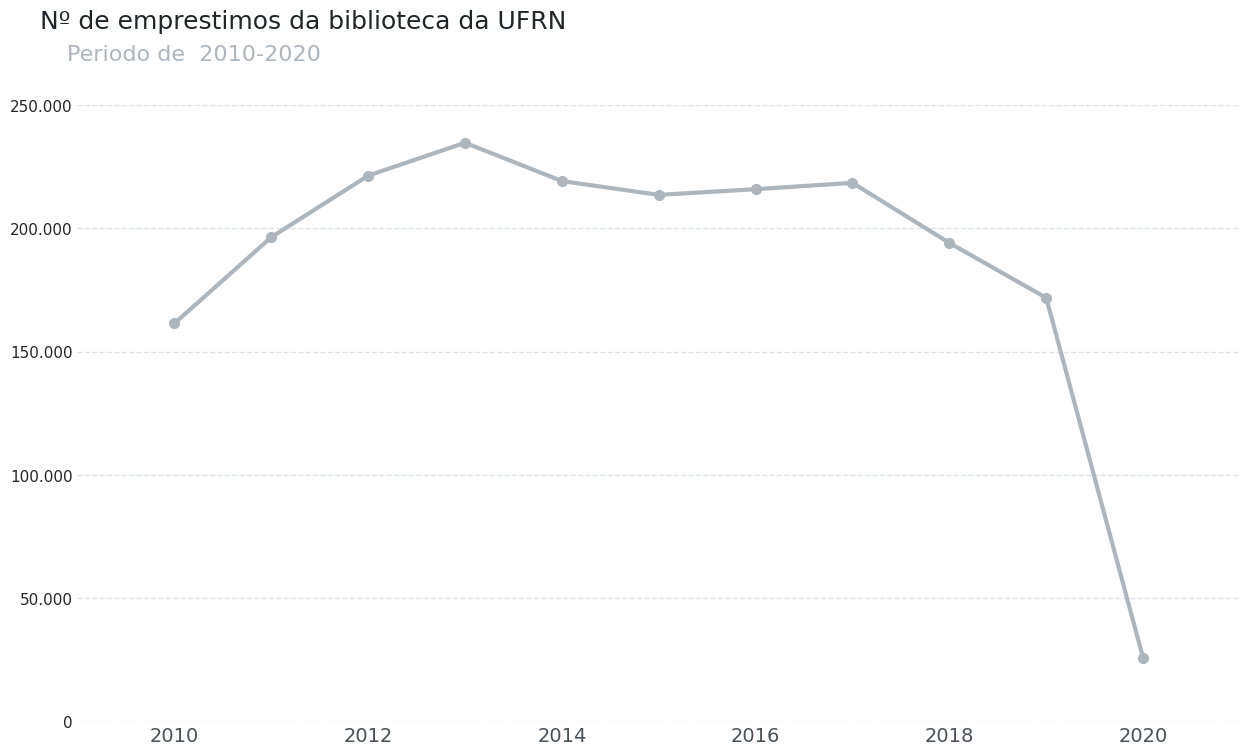

In [188]:
sns.set_theme(style = 'darkgrid')
fig , ax = plt.subplots(figsize = (15,8))
ax.plot(emprestimos_ano.index, emprestimos_ano['Nº emprestimos'], color ='#adb5bd',
        lw = 3, marker = 'o', markersize = 7,markerfacecolor = '#adb5bd'  )

fig.suptitle('Nº de emprestimos da biblioteca da UFRN', fontsize = 18,
             color = '#212529', ha = 'left', x = .1, y = 1)
ax.set_title('Periodo de  2010-2020', color = '#adb5bd', pad = 10, fontsize = 16, x = .1, y = 1.05)
ax.xaxis.set_tick_params(labelsize=14, labelcolor = '#495057')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.')))
ax.set_ylabel('')
ax.tick_params(axis="both", which="both", length=0)
ax.grid(axis = 'y', linestyle = '--' , color = '#dee2e6')
ax.set_frame_on(False)

plt.ylim(0,250000)
plt.xlim(2009,2021)


plt.show()

Pode-se observar que de 2010 a 2013  o número de empréstimos cresceu, mas apartir de 2013 houve uma queda suave e  em 2017 a diminuição da quantidade de
empréstimos foi bastante acentuada.


O ano de 2020 não há dados suficientes para serem avaliados.


É necessário uma investigação para averiguar a razão do declínio do número de empréstimos apartir de 2017.

## Número de exemplares emprestados por mês

In [189]:
emprestimos_mes = emprestimo_exemplares[['data_emprestimo', 'id_exemplar']].copy()
emprestimos_mes['Mês'] = emprestimos_mes['data_emprestimo'].dt.month
emprestimos_mes = emprestimos_mes.value_counts().groupby(['Mês']).sum().to_frame('Nº emprestimos')

dicionario_meses = {1:'Jan',2:'Fev',3:'Mar',4:'Abr',
                    5:'Mai',6:'Jun',7:'Jul',8:'Ago',
                    9:'Set',10:'Out',11:'Nov',12:'Dez'}

emprestimos_mes.index = emprestimos_mes.index.map(dicionario_meses)
emprestimos_mes

,Nº emprestimos
Mês,
Jan,67514
Fev,210200
Mar,252185
Abr,208725
Mai,202530
Jun,138123
Jul,123790
Ago,232793
Set,208234


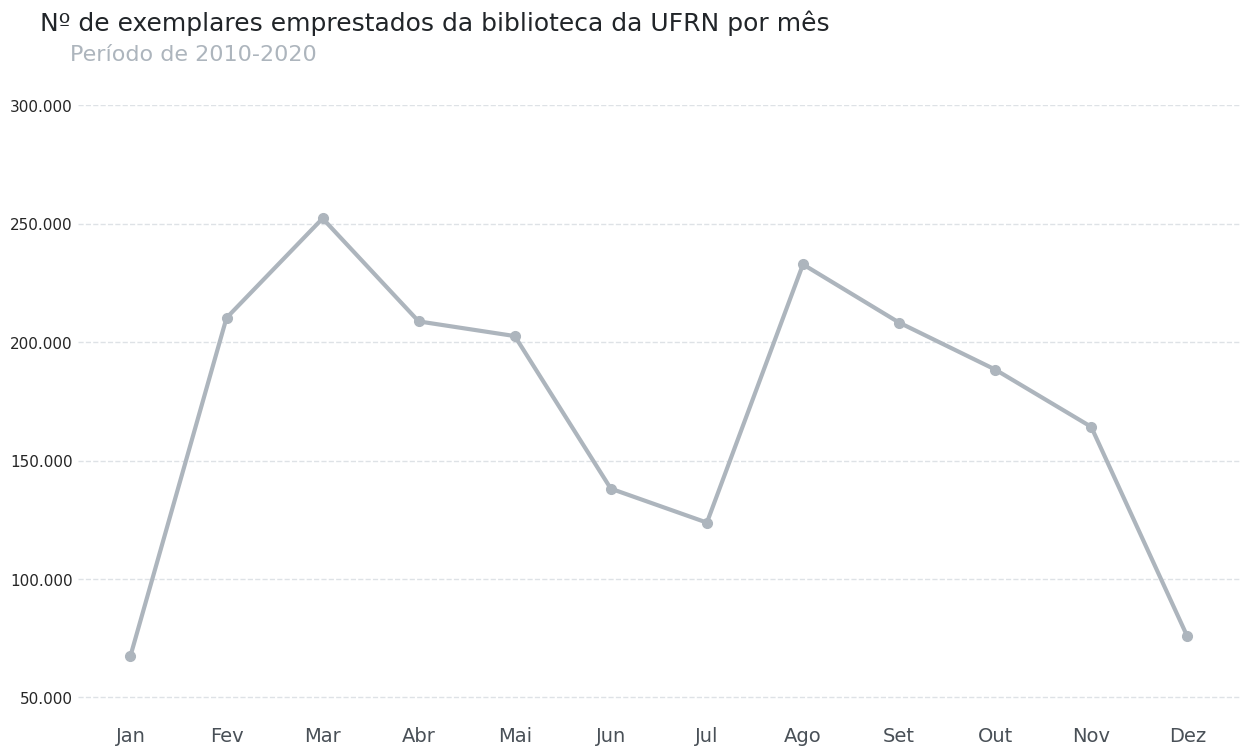

In [190]:
sns.set_theme(style = 'darkgrid')
fig , ax = plt.subplots(figsize = (15,8))
ax.plot(emprestimos_mes.index, emprestimos_mes['Nº emprestimos'], color ='#adb5bd',
        lw = 3, marker = 'o', markersize = 7,markerfacecolor = '#adb5bd'  )

fig.suptitle('Nº de exemplares emprestados da biblioteca da UFRN por mês', fontsize = 18,
             color = '#212529', ha = 'left', x = .1, y = 1)
ax.set_title('Período de 2010-2020', color = '#adb5bd', pad = 10, fontsize = 16, x = .1, y = 1.05)
ax.xaxis.set_tick_params(labelsize=14, labelcolor = '#495057')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.')))
ax.set_ylabel('')
ax.tick_params(axis="both", which="both", length=0)
ax.grid(axis = 'y', linestyle = '--' , color = '#dee2e6')
ax.set_frame_on(False)

plt.ylim(40000,300000)



plt.show()

Pode-se visualizar que os meses com maiores números de exemplares emprestados foram em março e agosto.

Nota-se que há um crescente no número de empréstimos ates dos meses os quais ocorrem os picos de empréstimo e após uma queda na quantidade exemplares alugados.

Cabe aqui uma investigação para averiguar a razão deses dois meses terem o maior número de emprestimos e logo após diminuição no número de empréstimos.

Os meses com o menor número de empréstimos foram janeiro, julho e dezembro por se tratar de meses de férias.

Pode-se desenvolver estratégias e ações de marketing da biblioteca para que se aumente o número de exemplares emprestados.

Como por exemplo: uma ação para que sejam realizados empréstimos de livros para a leitura nas férias de julho.


## Quantidade de emprestimos por hora

In [191]:
emprestimos_hora = emprestimo_exemplares[['data_emprestimo', 'id_exemplar']].copy()
emprestimos_hora['Hora'] = emprestimos_hora['data_emprestimo'].dt.hour
emprestimos_hora = emprestimos_hora.value_counts().groupby(['Hora']).sum().to_frame('Nº emprestimos')
emprestimos_hora

,Nº emprestimos
Hora,
0,17
6,14
7,18777
8,103416
9,131273
10,185839
11,180048
12,148754
13,126987


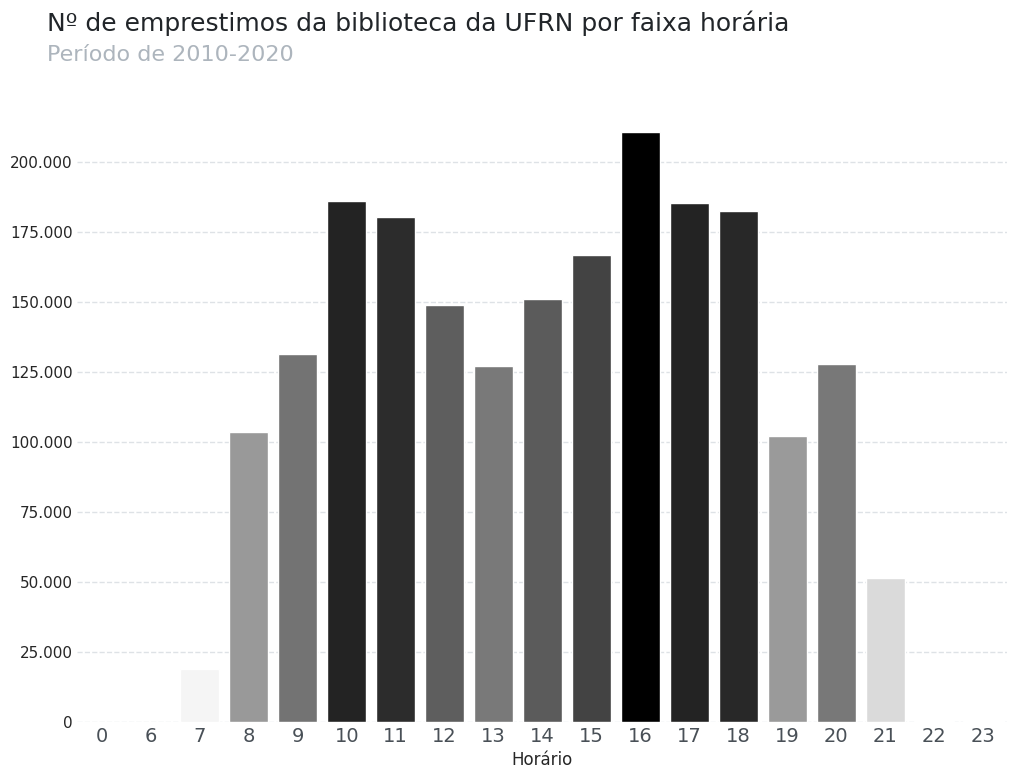

In [192]:
sns.set_theme(style = 'darkgrid')
fig , ax = plt.subplots(figsize = (12,8))
sns.barplot(data = emprestimos_hora, x = emprestimos_hora.index, y= 'Nº emprestimos', palette = 'Greys',
            hue = 'Nº emprestimos', legend = False)

fig.suptitle('Nº de emprestimos da biblioteca da UFRN por faixa horária', fontsize = 18,
             color = '#212529', ha = 'left', x = .1, y = 1)
ax.set_title('Período de 2010-2020', color = '#adb5bd', pad = 10, fontsize = 16, x = .1, y = 1.05)
ax.xaxis.set_tick_params(labelsize=14, labelcolor = '#495057')
ax.set_xlabel('Horário', fontsize = 12)
ax.set_ylabel('')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.')))
ax.tick_params(axis="both", which="both", length=0)
ax.grid(axis = 'y', linestyle = '--' , color = '#dee2e6')
ax.set_frame_on(False)

plt.ylim(0,220000)

plt.show()


Através do gráfico é possível identificar que os períodos das 10 h e 16 h são os de maior pico no atendimento de empréstimos.


Períodos do começo da manhã (entre 7h e 9) e da noite (entre 19h e 22) podem ser os melhores horários para que se realizem as demais atividades além do atendimento.

# 4-Análise exploratória de dados e Variáveis categóricas


In [193]:
emprestimo_exemplares.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,CDU
0,709684,L095049,NaT,2010-01-04 07:44:10.721,2010-01-05 16:26:12.662,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas.
1,709685,L167050,NaT,2010-01-04 07:44:10.750,2010-01-12 07:34:13.934,2008023265.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas.
2,709686,2006017618,2010-01-26 08:07:01.738,2010-01-04 08:08:44.081,2010-02-25 07:36:25.800,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,195347,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640,Ciências aplicadas.
3,709687,L184117,2010-01-18 11:07:46.470,2010-01-04 08:24:21.284,2010-02-03 08:58:45.692,200721119.0,ALUNO DE GRADUAÇÃO,131639,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609,Ciências aplicadas.
4,709688,2007027500,2010-01-19 15:59:26.464,2010-01-04 08:27:33.569,2010-02-03 13:06:30.662,2009045971.0,ALUNO DE GRADUAÇÃO,225646,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686,Ciências aplicadas.


## Verificando valores unicos

In [194]:
pd.unique(emprestimo_exemplares['tipo_vinculo_usuario'])


array(['ALUNO DE GRADUAÇÃO', 'ALUNO DE PÓS-GRADUAÇÃO', 'DOCENTE',
       'SERVIDOR TÉCNICO-ADMINISTRATIVO', 'DOCENTE EXTERNO',
       'ALUNO MÉDIO/TÉCNICO', 'USUÁRIO EXTERNO', 'OUTROS'], dtype=object)

In [195]:
pd.unique(emprestimo_exemplares['colecao'])

array(['Acervo Circulante', 'Folhetos', 'Teses', 'Dissertações',
       'Monografias', 'Publicações de Autores do RN',
       'Publicações da UFRN', 'Multimeios', 'Coleção Mossoroense',
       'Eventos', 'Trabalho Acadêmico', 'Obras de Referência',
       'Obras Raras', 'Literatura de Cordel', 'Coleção Zila Mamede',
       'Necessidades Educacionais Específicas'], dtype=object)

In [196]:
pd.unique(emprestimo_exemplares['biblioteca'])

array(['Biblioteca Central Zila Mamede',
       'Biblioteca Setorial Prof. Rodolfo Helinski - Escola Agrícola de Jundiaí - EAJ  - Macaiba',
       'Biblioteca Setorial Bertha Cruz Enders - \xadEscola de Saúde da UFRN - ESUFRN',
       'Biblioteca Setorial do Centro Ciências da Saúde - CCS',
       'Biblioteca Setorial Prof. Alberto Moreira Campos - \xadDepartamento de Odontologia',
       'Biblioteca Setorial Prof. Ronaldo Xavier de Arruda - CCET',
       'Biblioteca Setorial do Centro de Ciências Humanas, Letras e Artes - CCHLA',
       'Biblioteca Setorial Prof. Horácio Nicolas Solimo - \xad Engenharia Química - EQ - CT',
       'Biblioteca Setorial Prof. Francisco Gurgel De Azevedo - Instituto Química - IQ',
       'Biblioteca Setorial do Centro Ciências Sociais Aplicadas - CCSA',
       'Biblioteca Setorial do Departamento de Artes - DEART',
       'Biblioteca Setorial Prof. Dr. Marcelo Bezerra de Melo Tinôco - DARQ - \xadCT',
       'Biblioteca Setorial Árvore do Conhecimento - In

In [197]:
pd.unique(emprestimo_exemplares['CDU'])

array(['Ciências aplicadas.', 'Linguagem. Língua. Linguística.',
       'Ciências sociais.', 'Geografia. Biografia. História.',
       'Matemática e ciências naturais.', 'Religião.',
       'Generalidades. Ciência e conhecimento', 'Filosofia e psicologia.',
       'Belas artes.'], dtype=object)

# Frequência das variaveis categoricas

In [198]:
def frequencia(text):

  df = emprestimo_exemplares[text].value_counts().to_frame().reset_index()
  df.columns = [text.capitalize(),'Quantidade']
  df['Percentual %'] = round((df['Quantidade']/df['Quantidade'].sum()),4) *100
  return df

## Frequência por tipo de vinculo de usuário

In [199]:
frequencia('tipo_vinculo_usuario')

,Tipo_vinculo_usuario,Quantidade,Percentual %
0,ALUNO DE GRADUAÇÃO,1612324,77.80
1,ALUNO DE PÓS-GRADUAÇÃO,302541,14.60
2,DOCENTE,70981,3.42
3,SERVIDOR TÉCNICO-ADMINISTRATIVO,32184,1.55
4,ALUNO MÉDIO/TÉCNICO,28029,1.35
5,DOCENTE EXTERNO,23949,1.16
6,USUÁRIO EXTERNO,2509,0.12
7,OUTROS,5,0.00


O maior público da biblioteca são de fato os alunos de graduação com aproxidamente 77.80%, o segundo maior público é o de pós-graduação com aproximadamente 14.60%.

A diferença se deve pela maior quantidade de alunos de graduação presente na universidade.

## Frequência por coleção

In [200]:
frequencia('colecao')

,Colecao,Quantidade,Percentual %
0,Acervo Circulante,2053120,99.06
1,Multimeios,7954,0.38
2,Monografias,4021,0.19
3,Dissertações,2406,0.12
4,Obras de Referência,1954,0.09
5,Publicações de Autores do RN,866,0.04
6,Publicações da UFRN,764,0.04
7,Teses,714,0.03
8,Folhetos,271,0.01
9,Necessidades Educacionais Específicas,130,0.01


A principal coleção é a própria circulante o que se cria um alerta, pois está com 99% de todos os exemplares empréstados, pois é importante verificar se há exemplares em quantidades suficientes para atende a demanda.

As coleções: Coleção Mossoroense, Coleção Zila Mamede, Literatura de Cordel, Obras Raras devem ter uma atenção especial em entender a razão que estão com números tão pequenos de frequência.

Entretanto é importante verificar se esses documentos não estão disponíveis na coleção online e por este motivo não é emprestada fisicamente.

## Frequência por biblioteca

In [201]:
frequencia('biblioteca')

,Biblioteca,Quantidade,Percentual %
0,Biblioteca Central Zila Mamede,1426122,68.81
1,Biblioteca Setorial do Centro Ciências da Saúd...,118614,5.72
2,Biblioteca Setorial da Faculdade de Ciências d...,77609,3.74
3,Biblioteca Setorial Prof. Alberto Moreira Camp...,66447,3.21
4,Biblioteca Setorial Profª. Maria Lúcia da Cost...,61478,2.97
5,Biblioteca Setorial Bertha Cruz Enders - ­Esco...,46040,2.22
6,Biblioteca Setorial do Centro de Ciências Huma...,40744,1.97
7,Biblioteca Setorial Dr. Paulo Bezerra - EMCM/R...,32097,1.55
8,Biblioteca Setorial Profª. Maria José Mamede G...,29089,1.40
9,Biblioteca Setorial Prof. Rodolfo Helinski - E...,27219,1.31


A Biblioteca Central lidera o ranking com o maior porcentual de empréstimos.Isso já era esperado por a maior e a principal, com maior número de usuários cadastrados.

Vale lembrar que essa metrica considera valores absolutos. Para uma avaliação mais enriquecedora podemos considerar o numero de usuarios cadastros por biblioteca, o número de empéstimos esperados e ações de markenting de cada biblioteca.

## Frequência por CDU

In [202]:
frequencia('CDU')

,Cdu,Quantidade,Percentual %
0,Ciências aplicadas.,1425473,68.78
1,Ciências sociais.,369536,17.83
2,Matemática e ciências naturais.,68744,3.32
3,Generalidades. Ciência e conhecimento,62521,3.02
4,Religião.,62295,3.01
5,Filosofia e psicologia.,60563,2.92
6,Geografia. Biografia. História.,7989,0.39
7,Belas artes.,7911,0.38
8,Linguagem. Língua. Linguística.,7490,0.36


De maneira geral podemos observar que há uma grande diferença entre os temas.

Será importante entender a razão de materiais do tema de Geografia/Biografia/História, Belas artes e Linguagem estão com números tão baixos.

# Dia 5 - Analisando empréstimos com boxplot

## Alunos de graduação

In [203]:
df_aluno_graduacao = emprestimo_exemplares.query('tipo_vinculo_usuario == "ALUNO DE GRADUAÇÃO"').copy()
df_aluno_graduacao['colecao'].value_counts()


,count
colecao,
Acervo Circulante,1600155
Multimeios,4652
Monografias,3572
Dissertações,1152
Obras de Referência,1047
Publicações de Autores do RN,595
Publicações da UFRN,466
Teses,245
Folhetos,180


In [204]:
alunos_graduacao_acervo_circulante = df_aluno_graduacao.query('colecao == "Acervo Circulante"').copy()
alunos_graduacao_acervo_circulante['Ano'] = alunos_graduacao_acervo_circulante['data_emprestimo'].dt.year
alunos_graduacao_acervo_circulante['Mês'] = alunos_graduacao_acervo_circulante['data_emprestimo'].dt.month
alunos_graduacao_acervo_circulante = alunos_graduacao_acervo_circulante[['Ano','Mês']].value_counts().to_frame('Quantidade').reset_index()
alunos_graduacao_acervo_circulante

,Ano,Mês,Quantidade
0,2012,3,22797
1,2015,3,22483
2,2013,4,21853
3,2017,3,21735
4,2016,3,21692
...,...,...,...
118,2016,1,2670
119,2019,1,2276
120,2019,12,1980
121,2020,1,1781


In [205]:
def boxplot(dataset, x, y, titulo, subtitulo):

  sns.set_theme(style = 'darkgrid')
  fig, ax = plt.subplots(figsize = (15,8))

  sns.boxplot(data = dataset, x = x, y = y, palette = 'Blues', hue = x, legend = False)

  fig.suptitle(titulo, fontsize = 18, color = '#212529', ha = 'left', x = .14, y = 1, weight = 'bold')
  ax.set_title(subtitulo, fontsize = 14, color = '#495057',  ha = 'left', x = .01, y = 1.05)
  ax.xaxis.set_tick_params(labelsize=12)
  ax.yaxis.set_tick_params(labelsize=12)
  ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.')))
  ax.set_xlabel(x)
  ax.set_ylabel('')
  ax.tick_params(axis="both", which="both", length=0)
  ax.grid(axis = 'y', linestyle = '--' , color = '#ffffff')


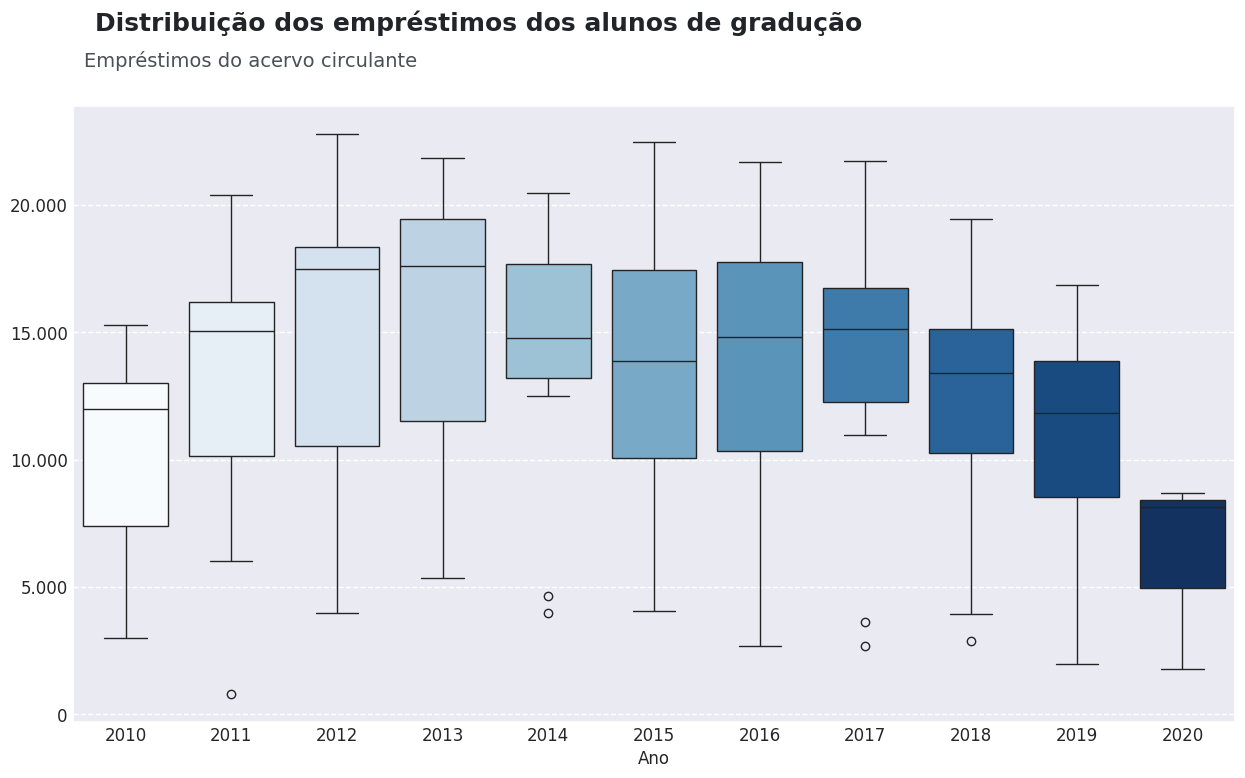

In [206]:
boxplot(alunos_graduacao_acervo_circulante, 'Ano','Quantidade','Distribuição dos empréstimos dos alunos de gradução', 'Empréstimos do acervo circulante')

O gráfico de boxplot (diagrama de caixa) apresenta a Distribuição dos empréstimos do acervo circulante dos alunos de graduação ao longo dos anos, de 2010 a 2020.

Cada caixa resume a distribuição dos empréstimos em um determinado ano, mostrando a mediana, os quartis e os valores atípicos (outliers).

Há uma tendência de crescimento entre 2010  e 2013 , indicando que, na metade dos anos, o número de empréstimos aumentou.

De 2013 a 2018, há uma relativa estabilidade, com exceção de 2017, onde se observa uma queda leve antes de um novo aumento.

## Alunos de pós-graduação

In [207]:
df_pos_alunos_graduacao = emprestimo_exemplares.query('tipo_vinculo_usuario == "ALUNO DE PÓS-GRADUAÇÃO"')
df_pos_alunos_graduacao['colecao'].value_counts()

,count
colecao,
Acervo Circulante,299201
Dissertações,934
Obras de Referência,700
Multimeios,559
Teses,367
Monografias,278
Publicações de Autores do RN,204
Publicações da UFRN,121
Folhetos,60


In [208]:
alunos_pos_graduacao = df_pos_alunos_graduacao.query('colecao == "Acervo Circulante"').copy()
alunos_pos_graduacao['Ano'] = alunos_pos_graduacao['data_emprestimo'].dt.year
alunos_pos_graduacao['Mês'] = alunos_pos_graduacao['data_emprestimo'].dt.month
alunos_pos_graduacao = alunos_pos_graduacao[['Ano','Mês']].value_counts().to_frame('Quantidade').reset_index()
alunos_pos_graduacao

,Ano,Mês,Quantidade
0,2015,3,3927
1,2017,8,3837
2,2017,3,3722
3,2016,3,3711
4,2016,8,3662
...,...,...,...
119,2020,1,1143
120,2010,1,1105
121,2019,12,1069
122,2011,1,465


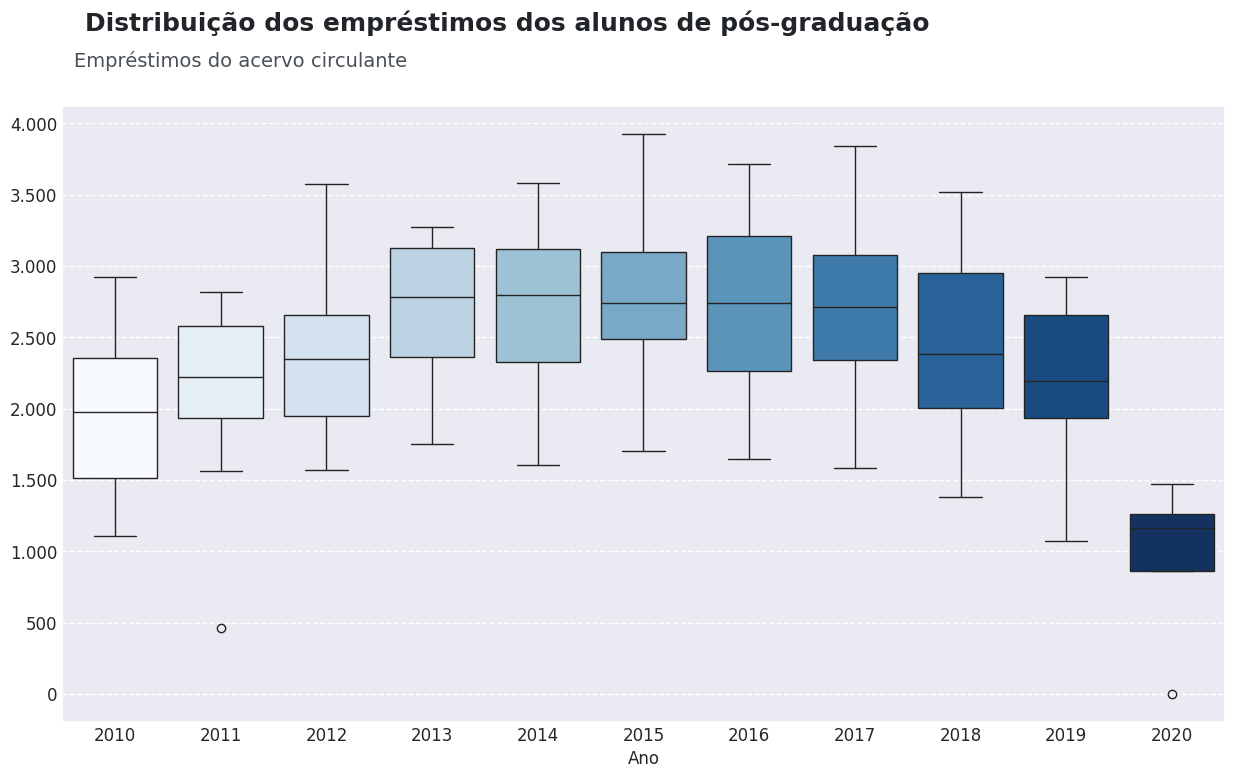

In [209]:
boxplot(alunos_pos_graduacao, 'Ano','Quantidade','Distribuição dos empréstimos dos alunos de pós-graduação', 'Empréstimos do acervo circulante')

Ao contrário do gráfico de Graduação, o volume de empréstimos na Pós-Graduação é significativamente menor.

Há um crescimento entre os anos de 2010 e 2013, e uma estabilidade até o ano de 2017.

O ano de 2018 apresenta uma queda que os anos seguintes acompanham.

# Dia 6- Novos dados, novas análises

## Lendo arquivo excel

In [210]:
url = 'https://github.com/Gabriellemga/Analise_Emprestimos_Biblioteca_UFRN/raw/refs/heads/main/dados_usuarios/matricula_alunos.xlsx'

In [211]:
pd.ExcelFile(url).sheet_names

['Até 2010', 'Após 2010']

In [212]:
ate_2010 = pd.read_excel(url, sheet_name = 'Até 2010', header = 1)
ate_2010

,Número da matrícula,Tipo de vinculo,Curso
0,1.900017e+08,ALUNO DE GRADUAÇÃO,MATEMÁTICA
1,1.990145e+08,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
2,1.997357e+08,ALUNO DE GRADUAÇÃO,MATEMÁTICA
3,1.998124e+08,ALUNO DE GRADUAÇÃO,LETRAS
4,1.998237e+08,ALUNO DE GRADUAÇÃO,ECOLOGIA
...,...,...,...
7721,2.009075e+09,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
7722,2.009075e+09,ALUNO DE GRADUAÇÃO,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS
7723,2.009075e+09,ALUNO DE GRADUAÇÃO,ADMINISTRAÇÃO
7724,2.009075e+09,ALUNO DE GRADUAÇÃO,MÚSICA


In [213]:
apos_2010 = pd.read_excel(url, sheet_name = 'Após 2010', header = 1)
apos_2010

,Matricula,Tipo de vinculo,Cursos
0,2.010000e+09,ALUNO DE GRADUAÇÃO,DIREITO
1,2.010000e+09,ALUNO DE GRADUAÇÃO,AGRONOMIA
2,2.010001e+09,ALUNO DE GRADUAÇÃO,ENGENHARIA QUÍMICA
3,2.010003e+09,ALUNO DE GRADUAÇÃO,ENGENHARIA AMBIENTAL
4,2.010003e+09,ALUNO DE GRADUAÇÃO,GEOGRAFIA
...,...,...,...
2269,2.015012e+10,ALUNO DE GRADUAÇÃO,LETRAS
2270,2.015075e+09,ALUNO DE GRADUAÇÃO,DANÇA
2271,2.016000e+10,ALUNO DE GRADUAÇÃO,ENGENHARIA DA COMPUTAÇÃO
2272,2.017009e+10,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


In [214]:
ate_2010.columns = ['matricula_ou_siape',	'tipo_vinculo_usuario',	'curso']
apos_2010.columns = ['matricula_ou_siape',	'tipo_vinculo_usuario',	'curso']

## Lendo arquivo json

In [215]:
from io import StringIO
url = 'https://raw.githubusercontent.com/Gabriellemga/Analise_Emprestimos_Biblioteca_UFRN/refs/heads/main/dados_usuarios/cadastro_alunos.json'
usuarios_json = pd.read_json(url)

cadastro_usuarios = pd.read_json(StringIO(usuarios_json.registros[0]))
cadastro_usuarios

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,2009029003,ALUNO DE GRADUAÇÃO,FILOSOFIA
1,200617346,ALUNO DE GRADUAÇÃO,DIREITO
2,200746502,ALUNO DE GRADUAÇÃO,ENGENHARIA DE PETRÓLEO
3,200504968,ALUNO DE GRADUAÇÃO,ADMINISTRAÇÃO
4,200615572,ALUNO DE GRADUAÇÃO,CIÊNCIA DA COMPUTAÇÃO
...,...,...,...
62797,20200012706,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
62798,20200039601,ALUNO DE GRADUAÇÃO,ENGENHARIA FLORESTAL
62799,20200132517,ALUNO DE GRADUAÇÃO,AGRONOMIA
62800,20200009344,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


## Concatenando os datasets

In [216]:
usuarios_graduacao = pd.concat([ate_2010,apos_2010,cadastro_usuarios ])
usuarios_graduacao

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,1.900017e+08,ALUNO DE GRADUAÇÃO,MATEMÁTICA
1,1.990145e+08,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
2,1.997357e+08,ALUNO DE GRADUAÇÃO,MATEMÁTICA
3,1.998124e+08,ALUNO DE GRADUAÇÃO,LETRAS
4,1.998237e+08,ALUNO DE GRADUAÇÃO,ECOLOGIA
...,...,...,...
62797,2.020001e+10,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
62798,2.020004e+10,ALUNO DE GRADUAÇÃO,ENGENHARIA FLORESTAL
62799,2.020013e+10,ALUNO DE GRADUAÇÃO,AGRONOMIA
62800,2.020001e+10,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


##

In [217]:
usuarios_graduacao.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72802 entries, 0 to 62801
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   matricula_ou_siape    72802 non-null  float64
 1   tipo_vinculo_usuario  72802 non-null  object 
 2   curso                 72802 non-null  object 
dtypes: float64(1), object(2)
memory usage: 2.2+ MB


In [218]:
usuarios_graduacao.matricula_ou_siape = usuarios_graduacao.matricula_ou_siape.astype('string')

## Filtrando os dados apartir de 2015

In [219]:
df_filtrada = emprestimo_exemplares.query('tipo_vinculo_usuario == "ALUNO DE GRADUAÇÃO"').copy()
df_filtrada = df_filtrada.query('data_emprestimo >= 2015')
df_filtrada = df_filtrada.loc[:,['matricula_ou_siape','data_emprestimo']]
df_filtrada= df_filtrada.reset_index(drop = True)
df_filtrada


,matricula_ou_siape,data_emprestimo
0,2013021576.0,2015-01-02 09:16:49.566
1,2014026648.0,2015-01-02 09:44:42.808
2,2014026648.0,2015-01-02 09:44:43.127
3,2010049586.0,2015-01-02 10:11:09.837
4,2014021454.0,2015-01-02 10:19:38.087
...,...,...
788099,20190154579.0,2020-03-18 16:26:20.477
788100,20160129109.0,2020-03-18 16:41:28.500
788101,20160129109.0,2020-03-18 16:41:28.588
788102,20160129109.0,2020-03-18 16:41:28.662


## Limpando os dados nulos

In [220]:
df_filtrada.isnull().sum()

,0
matricula_ou_siape,94
data_emprestimo,0


In [221]:
df_filtrada = df_filtrada.dropna()
df_filtrada.isnull().sum()

,0
matricula_ou_siape,0
data_emprestimo,0


## Mesclando tabelas

In [222]:
qtd_emprestimos = df_filtrada.merge(usuarios_graduacao)
qtd_emprestimos

,matricula_ou_siape,data_emprestimo,tipo_vinculo_usuario,curso
0,2013021576.0,2015-01-02 09:16:49.566,ALUNO DE GRADUAÇÃO,ENGENHARIA CIVIL
1,2014026648.0,2015-01-02 09:44:42.808,ALUNO DE GRADUAÇÃO,CIÊNCIA DA COMPUTAÇÃO
2,2014026648.0,2015-01-02 09:44:43.127,ALUNO DE GRADUAÇÃO,CIÊNCIA DA COMPUTAÇÃO
3,2010049586.0,2015-01-02 10:11:09.837,ALUNO DE GRADUAÇÃO,CIÊNCIAS E TECNOLOGIA
4,2014021454.0,2015-01-02 10:19:38.087,ALUNO DE GRADUAÇÃO,FILOSOFIA
...,...,...,...,...
787988,20190154579.0,2020-03-18 16:26:20.477,ALUNO DE GRADUAÇÃO,ARQUITETURA E URBANISMO
787989,20160129109.0,2020-03-18 16:41:28.500,ALUNO DE GRADUAÇÃO,MATEMÁTICA
787990,20160129109.0,2020-03-18 16:41:28.588,ALUNO DE GRADUAÇÃO,MATEMÁTICA
787991,20160129109.0,2020-03-18 16:41:28.662,ALUNO DE GRADUAÇÃO,MATEMÁTICA


## Filtrando os cursos selecionados

In [223]:
cursos = ['BIBLIOTECONOMIA', 'CIÊNCIAS SOCIAIS', 'COMUNICAÇÃO SOCIAL','DIREITO', 'FILOSOFIA', 'PEDAGOGIA']

In [224]:
qtd_emprestimos = qtd_emprestimos.query('curso == @cursos')
qtd_emprestimos

,matricula_ou_siape,data_emprestimo,tipo_vinculo_usuario,curso
4,2014021454.0,2015-01-02 10:19:38.087,ALUNO DE GRADUAÇÃO,FILOSOFIA
5,2013018187.0,2015-01-02 10:25:40.883,ALUNO DE GRADUAÇÃO,DIREITO
13,2014029499.0,2015-01-02 12:26:43.571,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS
14,2014029499.0,2015-01-02 12:26:43.840,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS
15,2014029499.0,2015-01-02 12:26:44.750,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS
...,...,...,...,...
787963,20200090284.0,2020-03-17 20:23:54.966,ALUNO DE GRADUAÇÃO,DIREITO
787980,20180113385.0,2020-03-17 21:20:47.278,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS
787985,20190150079.0,2020-03-18 13:43:53.220,ALUNO DE GRADUAÇÃO,PEDAGOGIA
787986,20190150079.0,2020-03-18 13:43:53.389,ALUNO DE GRADUAÇÃO,PEDAGOGIA


In [225]:
qtd_emprestimos['Ano'] = qtd_emprestimos.data_emprestimo.dt.year
qtd_emprestimos = qtd_emprestimos.groupby(['curso','Ano'])['data_emprestimo'].count().to_frame('Quantidade').reset_index()
pd.pivot_table(qtd_emprestimos, index = 'curso', columns = 'Ano', values='Quantidade',aggfunc='sum', margins = True, margins_name='Total')

/tmp/ipython-input-2863101966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qtd_emprestimos['Ano'] = qtd_emprestimos.data_emprestimo.dt.year


Ano,2015,2016,2017,2018,2019,2020,Total
curso,,,,,,,
BIBLIOTECONOMIA,7784,7044,7307,6378,5889,900,35302
CIÊNCIAS SOCIAIS,7489,6978,6918,6181,5788,825,34179
COMUNICAÇÃO SOCIAL,7147,7973,8253,6953,5885,796,37007
DIREITO,7665,7363,7885,7027,5861,905,36706
FILOSOFIA,6950,7576,7389,6296,5572,832,34615
PEDAGOGIA,7189,7153,7434,6518,5869,866,35029
Total,44224,44087,45186,39353,34864,5124,212838


# Dia 7

## Filtando os alunos de pós-graduação do dataset de empréstimos

In [226]:
emprestimo_exemplares.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,CDU
0,709684,L095049,NaT,2010-01-04 07:44:10.721,2010-01-05 16:26:12.662,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas.
1,709685,L167050,NaT,2010-01-04 07:44:10.750,2010-01-12 07:34:13.934,2008023265.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas.
2,709686,2006017618,2010-01-26 08:07:01.738,2010-01-04 08:08:44.081,2010-02-25 07:36:25.800,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,195347,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640,Ciências aplicadas.
3,709687,L184117,2010-01-18 11:07:46.470,2010-01-04 08:24:21.284,2010-02-03 08:58:45.692,200721119.0,ALUNO DE GRADUAÇÃO,131639,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609,Ciências aplicadas.
4,709688,2007027500,2010-01-19 15:59:26.464,2010-01-04 08:27:33.569,2010-02-03 13:06:30.662,2009045971.0,ALUNO DE GRADUAÇÃO,225646,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686,Ciências aplicadas.


In [227]:
pos_graduacao = emprestimo_exemplares.query('tipo_vinculo_usuario == "ALUNO DE PÓS-GRADUAÇÃO"')
pos_graduacao = pos_graduacao.query('data_emprestimo >= 2017 and data_emprestimo < 2021' )
pos_graduacao = pos_graduacao.loc[:,['matricula_ou_siape','data_emprestimo']].reset_index(drop = True)
pos_graduacao

,matricula_ou_siape,data_emprestimo
0,20161011168.0,2017-01-02 08:29:46.722
1,20161011168.0,2017-01-02 08:29:46.794
2,20161011168.0,2017-01-02 08:46:42.991
3,20161011168.0,2017-01-02 08:46:43.400
4,20161013903.0,2017-01-02 09:41:45.823
...,...,...
92118,20191017055.0,2020-03-19 14:41:57.754
92119,20191017055.0,2020-03-19 14:42:56.670
92120,20191017055.0,2020-03-19 14:43:40.666
92121,20201014993.0,2020-06-09 11:54:02.669


## Limpando dados nulos

In [228]:
pos_graduacao.isnull().sum()

,0
matricula_ou_siape,11
data_emprestimo,0


In [229]:
pos_graduacao = pos_graduacao.dropna()
pos_graduacao.isnull().sum()

,0
matricula_ou_siape,0
data_emprestimo,0


In [230]:
pos_graduacao.matricula_ou_siape = pos_graduacao.matricula_ou_siape.apply(lambda x: x.replace('.0',''))

/tmp/ipython-input-3969510311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_graduacao.matricula_ou_siape = pos_graduacao.matricula_ou_siape.apply(lambda x: x.replace('.0',''))


## Importando o dataset com os dados do cadastro dos alunos de pos-graduação

In [231]:
from io import StringIO
url = 'https://raw.githubusercontent.com/Gabriellemga/Analise_Emprestimos_Biblioteca_UFRN/refs/heads/main/dados_usuarios/cadastro_alunos.json'
usuarios_json = pd.read_json(url)

cadastro_usuarios_pos_graduacao = pd.read_json(StringIO(usuarios_json.registros[1]))
cadastro_usuarios_pos_graduacao

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,2008112114,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS ODONTOLÓGICAS
1,2008106583,ALUNO DE PÓS-GRADUAÇÃO,ENGENHARIA DE SOFTWARE
2,2011101417,ALUNO DE PÓS-GRADUAÇÃO,ARQUITETURA E URBANISMO
3,2011113122,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
4,2010110903,ALUNO DE PÓS-GRADUAÇÃO,ARTES CÊNICAS
...,...,...,...
19435,20201013501,ALUNO DE PÓS-GRADUAÇÃO,GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO
19436,20201014062,ALUNO DE PÓS-GRADUAÇÃO,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO"
19437,20201017690,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS DA SAÚDE
19438,20201014465,ALUNO DE PÓS-GRADUAÇÃO,DESIGN


In [232]:
cadastro_usuarios_pos_graduacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19440 entries, 0 to 19439
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   matricula_ou_siape    19440 non-null  int64 
 1   tipo_vinculo_usuario  19440 non-null  object
 2   curso                 19440 non-null  object
dtypes: int64(1), object(2)
memory usage: 455.8+ KB


In [233]:
cadastro_usuarios_pos_graduacao.matricula_ou_siape = cadastro_usuarios_pos_graduacao.matricula_ou_siape.astype('string')


# Mesclando os dados dos emprestimos com o cadastro dos alunos de pós-graduação

In [234]:
emprestimos_2017_2020 = pos_graduacao.merge(cadastro_usuarios_pos_graduacao, on = 'matricula_ou_siape')
emprestimos_2017_2020

,matricula_ou_siape,data_emprestimo,tipo_vinculo_usuario,curso
0,20161011168,2017-01-02 08:29:46.722,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
1,20161011168,2017-01-02 08:29:46.794,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
2,20161011168,2017-01-02 08:46:42.991,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
3,20161011168,2017-01-02 08:46:43.400,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
4,20161013903,2017-01-02 09:41:45.823,ALUNO DE PÓS-GRADUAÇÃO,DESIGN
...,...,...,...,...
92057,20191017055,2020-03-19 14:41:57.754,ALUNO DE PÓS-GRADUAÇÃO,ENGENHARIA CIVIL
92058,20191017055,2020-03-19 14:42:56.670,ALUNO DE PÓS-GRADUAÇÃO,ENGENHARIA CIVIL
92059,20191017055,2020-03-19 14:43:40.666,ALUNO DE PÓS-GRADUAÇÃO,ENGENHARIA CIVIL
92060,20201014993,2020-06-09 11:54:02.669,ALUNO DE PÓS-GRADUAÇÃO,DESIGN


## Modificando a coluna data de empéstimo

In [235]:
emprestimos_2017_2020.data_emprestimo = emprestimos_2017_2020.data_emprestimo.dt.year
emprestimos_2017_2020

,matricula_ou_siape,data_emprestimo,tipo_vinculo_usuario,curso
0,20161011168,2017,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
1,20161011168,2017,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
2,20161011168,2017,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
3,20161011168,2017,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
4,20161013903,2017,ALUNO DE PÓS-GRADUAÇÃO,DESIGN
...,...,...,...,...
92057,20191017055,2020,ALUNO DE PÓS-GRADUAÇÃO,ENGENHARIA CIVIL
92058,20191017055,2020,ALUNO DE PÓS-GRADUAÇÃO,ENGENHARIA CIVIL
92059,20191017055,2020,ALUNO DE PÓS-GRADUAÇÃO,ENGENHARIA CIVIL
92060,20201014993,2020,ALUNO DE PÓS-GRADUAÇÃO,DESIGN


## Contando a quantidade de empréstimos por ano

In [236]:
emprestimos_2017_2020 = emprestimos_2017_2020.iloc[:,[1,3]]
emprestimos_2017_2020 = emprestimos_2017_2020.value_counts().reset_index()
emprestimos_2017_2020.columns = ['Ano', 'Curso', 'Quantidade']
emprestimos_2017_2020

,Ano,Curso,Quantidade
0,2018,CIÊNCIAS ODONTOLÓGICAS,2540
1,2017,ADMINISTRAÇÃO,2538
2,2017,ENGENHARIA DE SOFTWARE,2477
3,2017,CIÊNCIAS DA SAÚDE,2434
4,2017,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",2415
5,2017,CIÊNCIAS ODONTOLÓGICAS,2414
6,2017,ENGENHARIA CIVIL,2399
7,2018,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",2365
8,2017,CIÊNCIA E ENGENHARIA DE MATERIAIS,2316
9,2018,ADMINISTRAÇÃO,2316


## Pivotando tabela

In [237]:
emprestimos_2017_2020 = pd.pivot_table(emprestimos_2017_2020, index = 'Curso', columns = 'Ano', values='Quantidade',aggfunc='sum')
emprestimos_2017_2020

Ano,2017,2018,2019,2020
Curso,,,,
ADMINISTRAÇÃO,2538,2316,1692,269
ARQUITETURA E URBANISMO,2209,1917,1818,257
ARTES CÊNICAS,2115,2082,1812,229
BIOINFORMÁTICA,2190,1914,1825,263
BIOQUÍMICA,2294,1944,2057,272
CIÊNCIA E ENGENHARIA DE MATERIAIS,2316,2110,2008,328
"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",2415,2365,2026,303
CIÊNCIAS DA SAÚDE,2434,1986,1825,234
CIÊNCIAS ODONTOLÓGICAS,2414,2540,2134,352


## Importando os dados de previsão

In [238]:
previsao_2022 = pd.read_csv('https://raw.githubusercontent.com/Gabriellemga/Analise_Emprestimos_Biblioteca_UFRN/refs/heads/main/dados_usuarios/pr%C3%A9-visto.csv', sep = ' ')
previsao_2022

,curso,previsao_2022
0,administracao,1905
1,arquitetura_e_urbanismo,1896
2,artes_cenicas,1920
3,bioinformatica,2302
4,bioquimica,2090
5,ciencia_e_engenharia_de_materiais,2010
6,ciencia_tecnologia_e_inovacao,1960
7,ciencias_da_saude,1730
8,ciencias_odontologicas,2405
9,design,1900


In [239]:
previsao_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   curso          14 non-null     object
 1   previsao_2022  14 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 356.0+ bytes


## Unindo tabelas

In [240]:
previsao_2022.index = emprestimos_2017_2020.index
emprestimos_2017_2020['2022'] = previsao_2022.iloc[:,1]
emprestimos_2017_2020

Ano,2017,2018,2019,2020,2022
Curso,,,,,
ADMINISTRAÇÃO,2538,2316,1692,269,1905
ARQUITETURA E URBANISMO,2209,1917,1818,257,1896
ARTES CÊNICAS,2115,2082,1812,229,1920
BIOINFORMÁTICA,2190,1914,1825,263,2302
BIOQUÍMICA,2294,1944,2057,272,2090
CIÊNCIA E ENGENHARIA DE MATERIAIS,2316,2110,2008,328,2010
"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",2415,2365,2026,303,1960
CIÊNCIAS DA SAÚDE,2434,1986,1825,234,1730
CIÊNCIAS ODONTOLÓGICAS,2414,2540,2134,352,2405


## Modificando tipo de dado

In [241]:
emprestimos_2017_2020.columns = emprestimos_2017_2020.columns.astype(str)
emprestimos_2017_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, ADMINISTRAÇÃO to GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2017    14 non-null     int64
 1   2018    14 non-null     int64
 2   2019    14 non-null     int64
 3   2020    14 non-null     int64
 4   2022    14 non-null     int64
dtypes: int64(5)
memory usage: 672.0+ bytes


In [242]:
percentual = pd.DataFrame()
percentual['2018']= (((emprestimos_2017_2020['2018'] - emprestimos_2017_2020['2017'])/emprestimos_2017_2020['2017']) * 100).round(2)
percentual['2019']= (((emprestimos_2017_2020['2019'] - emprestimos_2017_2020['2018'])/emprestimos_2017_2020['2018']) * 100).round(2)
percentual['2022']= (((emprestimos_2017_2020['2020'] - emprestimos_2017_2020['2019'])/emprestimos_2017_2020['2019']) * 100).round(2)
percentual

,2018,2019,2022
Curso,,,
ADMINISTRAÇÃO,-8.75,-26.94,-84.10
ARQUITETURA E URBANISMO,-13.22,-5.16,-85.86
ARTES CÊNICAS,-1.56,-12.97,-87.36
BIOINFORMÁTICA,-12.60,-4.65,-85.59
BIOQUÍMICA,-15.26,5.81,-86.78
CIÊNCIA E ENGENHARIA DE MATERIAIS,-8.89,-4.83,-83.67
"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",-2.07,-14.33,-85.04
CIÊNCIAS DA SAÚDE,-18.41,-8.11,-87.18
CIÊNCIAS ODONTOLÓGICAS,5.22,-15.98,-83.51


## Formatando dados da tabela

In [243]:
percentual.reset_index(inplace=True)
percentual.columns = percentual.columns.str.capitalize()
percentual.Curso = percentual.Curso.str.capitalize()
percentual

,Curso,2018,2019,2022
0,Administração,-8.75,-26.94,-84.10
1,Arquitetura e urbanismo,-13.22,-5.16,-85.86
2,Artes cênicas,-1.56,-12.97,-87.36
3,Bioinformática,-12.60,-4.65,-85.59
4,Bioquímica,-15.26,5.81,-86.78
5,Ciência e engenharia de materiais,-8.89,-4.83,-83.67
6,"Ciência, tecnologia e inovação",-2.07,-14.33,-85.04
7,Ciências da saúde,-18.41,-8.11,-87.18
8,Ciências odontológicas,5.22,-15.98,-83.51
9,Design,-19.10,0.16,-86.20


# Criando tabela em HTML


## Estruturando formatação da tabela em CSS

In [244]:

th_props = [
  ('font-size', '1.4rem'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', 'whitesmoke'),
  ('background-color', '#001692'),
  ('border-radius', '0.25rem'),
  ('box-shadow','0 0 1rem gray')
  ]

td_props = [
  ('font-size', '1rem'),
  ('padding','0.5rem'),
  ('text-align', 'left'),
  ('font-weight', 'bold'),
  ('border-bottom','0.1rem solid lightgray')
  ]

styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]


## Gerando tabela em HTML

In [245]:
percentual.style.text_gradient(cmap='RdYlGn',low=1, axis=1,vmax=0.1,vmin=0)\
                              .format('{:.2f} %',subset=['2018','2019','2022'])\
                              .hide(axis='index')\
                              .set_table_styles(styles)\
                              .to_html('teste.html',doctype_html =True,
                                       table_attributes='ALIGN=LEFT WIDTH=50% CELLSPACING = 5')